## Step1. 데이터 탐색 (EDA : Exploratory Data Analysis)

#### Importing data using Pandas

In [453]:
import pandas as pd 

In [454]:
# 한글 폰트가 깨지는 문제 해결용
from matplotlib.pyplot import rc
rc('font',family='New Gulim')

In [455]:
# 윈도우 환경에서 파일을 그대로 읽으면 유니코드 에러 발생, encoding을 CP949로 강제 지정해준다
data = pd.read_csv('Input/dfe_mct_data_set.csv',encoding='CP949')
## data = pd.read_csv('../Input/creditcard.csv',header=None)

In [456]:
print("고려대 인근 카드 이용고객 내역 -  rows:",data.shape[0]," columns:", data.shape[1])

고려대 인근 카드 이용고객 내역 -  rows: 217607  columns: 13


In [457]:
data.head()

,CLNN,CLN_AGE,SEX_CCD,MCT_N,MCT_RY_CD,MCT_RY_NM,LAL_MCT_XC_VL,LAL_MCT_YC_VL,APV_TS_D,APV_TS_DL_TM,CRD_TCD,NS_MS_CN,SAA
0,AA301810473,47,M,MM338736705,811000,종합병원,127.027019,37.587212,20171010,131835,0,0,400
1,AA359351932,32,M,MM270435483,215000,편의점,127.027019,37.587212,20171011,195305,0,0,500
2,AA163500364,24,F,MM270435483,215000,편의점,127.027019,37.587212,20171002,215852,1,0,600
3,AA301810473,47,M,MM270435483,215000,편의점,127.027019,37.587212,20171024,143102,0,0,700
4,AA375934003,24,M,MM346843093,215000,편의점,127.027019,37.587212,20171011,92733,1,0,800


In [458]:
data.keys()

Index(['CLNN', 'CLN_AGE', 'SEX_CCD', 'MCT_N', 'MCT_RY_CD', 'MCT_RY_NM',
       'LAL_MCT_XC_VL', 'LAL_MCT_YC_VL', 'APV_TS_D', 'APV_TS_DL_TM', 'CRD_TCD',
       'NS_MS_CN', 'SAA'],
      dtype='object')

In [459]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217607 entries, 0 to 217606
Data columns (total 13 columns):
CLNN             217607 non-null object
CLN_AGE          217607 non-null int64
SEX_CCD          217607 non-null object
MCT_N            217607 non-null object
MCT_RY_CD        217607 non-null int64
MCT_RY_NM        217607 non-null object
LAL_MCT_XC_VL    217607 non-null float64
LAL_MCT_YC_VL    217607 non-null float64
APV_TS_D         217607 non-null int64
APV_TS_DL_TM     217607 non-null int64
CRD_TCD          217607 non-null int64
NS_MS_CN         217607 non-null int64
SAA              217607 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 21.6+ MB


#### Looking at the percentage of missing values per column

In [460]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/217607)*100})
missing_data

,total_missing,perc_missing
CLNN,0,0.0
CLN_AGE,0,0.0
SEX_CCD,0,0.0
MCT_N,0,0.0
MCT_RY_CD,0,0.0
MCT_RY_NM,0,0.0
LAL_MCT_XC_VL,0,0.0
LAL_MCT_YC_VL,0,0.0
APV_TS_D,0,0.0
APV_TS_DL_TM,0,0.0


#### missing data는 없는 것으로 확인됨

### 데이터 전처리 (preprocessing)

#### - 승인일시와 승인시각을 합쳐서 datetime format으로 저장

In [461]:
# data_clean : 전처리하여 저장할 데이터
data_clean=data

In [462]:
## int type의 승인일자 데이터 포맷을 string으로 변경
data_clean['APV_TS_D']=data_clean['APV_TS_D'].astype(str)
# data_clean['APV_TS_D']=pd.to_datetime(data_clean['APV_TS_D'], format='%Y%m%d')

In [463]:
# int type으로 잘못 저장된 승인일시를 string으로 변경하고, 앞에 0을 채움
data_clean['APV_TS_DL_TM']=data_clean['APV_TS_DL_TM'].astype(str).str.zfill(6)

In [464]:
# 전처리된 새 dataframe을 추가
data_clean['APV_TS_DATETIME']= pd.to_datetime(data_clean['APV_TS_D'] + ' ' + data_clean['APV_TS_DL_TM'], format='%Y%m%d %H:%M:%S')

In [465]:
# data_clean['APV_DATETIME']

In [466]:
data_clean.head()

,CLNN,CLN_AGE,SEX_CCD,MCT_N,MCT_RY_CD,MCT_RY_NM,LAL_MCT_XC_VL,LAL_MCT_YC_VL,APV_TS_D,APV_TS_DL_TM,CRD_TCD,NS_MS_CN,SAA,APV_TS_DATETIME
0,AA301810473,47,M,MM338736705,811000,종합병원,127.027019,37.587212,20171010,131835,0,0,400,2017-10-10 13:18:35
1,AA359351932,32,M,MM270435483,215000,편의점,127.027019,37.587212,20171011,195305,0,0,500,2017-10-11 19:53:05
2,AA163500364,24,F,MM270435483,215000,편의점,127.027019,37.587212,20171002,215852,1,0,600,2017-10-02 21:58:52
3,AA301810473,47,M,MM270435483,215000,편의점,127.027019,37.587212,20171024,143102,0,0,700,2017-10-24 14:31:02
4,AA375934003,24,M,MM346843093,215000,편의점,127.027019,37.587212,20171011,092733,1,0,800,2017-10-11 09:27:33


In [467]:
data_clean.describe()

,CLN_AGE,MCT_RY_CD,LAL_MCT_XC_VL,LAL_MCT_YC_VL,CRD_TCD,NS_MS_CN,SAA
count,217607.000000,217607.000000,217607.000000,217607.000000,217607.000000,217607.000000,2.176070e+05
mean,33.038735,371046.740224,127.029934,37.586242,0.663306,0.023055,1.680763e+04
std,13.646205,201573.724514,0.001939,0.001874,0.472580,0.324283,1.211919e+05
min,14.000000,115000.000000,127.023601,37.582073,0.000000,0.000000,-5.000000e+06
25%,23.000000,215000.000000,127.029160,37.584771,0.000000,0.000000,2.900000e+03
50%,27.000000,312000.000000,127.029640,37.586536,1.000000,0.000000,5.400000e+03
75%,43.000000,331000.000000,127.031232,37.587526,1.000000,0.000000,1.100000e+04
max,95.000000,982000.000000,127.034845,37.590431,1.000000,24.000000,1.500000e+07


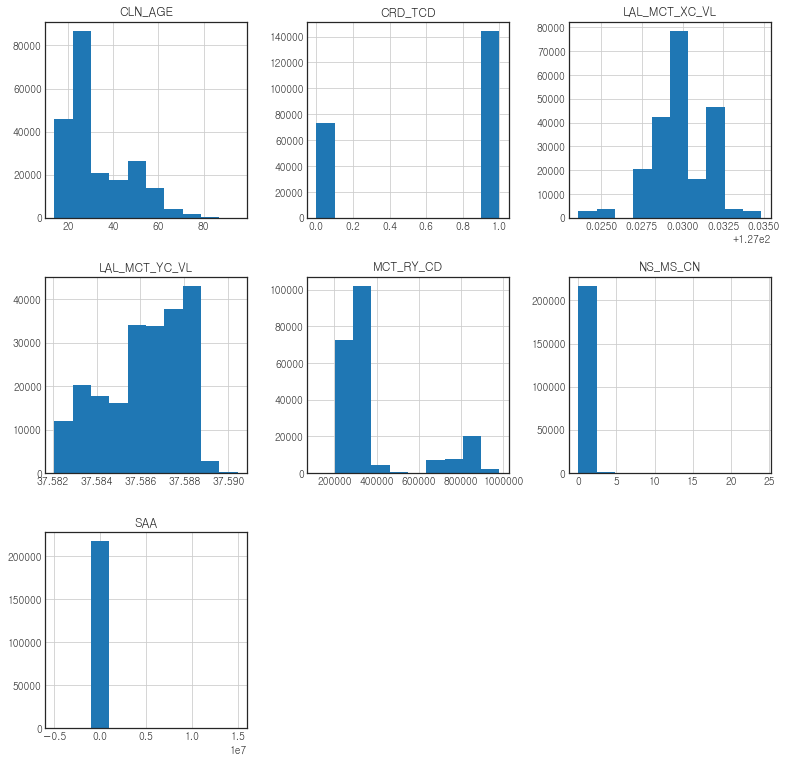

In [468]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Feature별 histogram
data_clean.hist(figsize = (13,13))
plt.show()

#### - 히스토그램 결과에서 취급액(SAA)에 minus 값 존재, minus인 값 삭제(전처리)

In [469]:
data_clean = data_clean.loc[data_clean['SAA'] > 0]

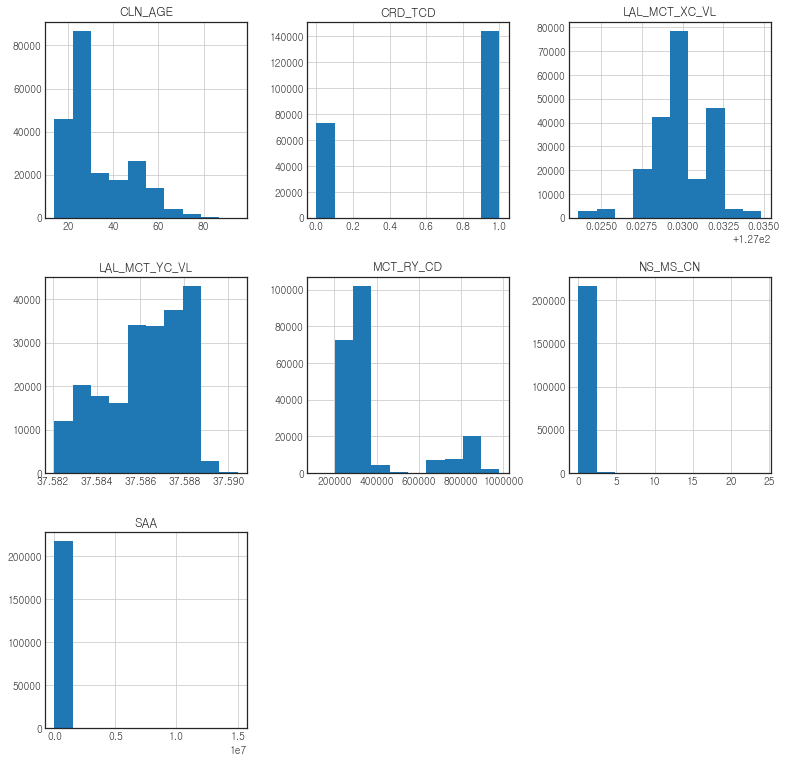

In [470]:
data_clean.hist(figsize = (13,13))
plt.show()

#### 금액(SAA) 항목이 모두 >=0인 것을 확인함

In [471]:
data_clean.head()

,CLNN,CLN_AGE,SEX_CCD,MCT_N,MCT_RY_CD,MCT_RY_NM,LAL_MCT_XC_VL,LAL_MCT_YC_VL,APV_TS_D,APV_TS_DL_TM,CRD_TCD,NS_MS_CN,SAA,APV_TS_DATETIME
0,AA301810473,47,M,MM338736705,811000,종합병원,127.027019,37.587212,20171010,131835,0,0,400,2017-10-10 13:18:35
1,AA359351932,32,M,MM270435483,215000,편의점,127.027019,37.587212,20171011,195305,0,0,500,2017-10-11 19:53:05
2,AA163500364,24,F,MM270435483,215000,편의점,127.027019,37.587212,20171002,215852,1,0,600,2017-10-02 21:58:52
3,AA301810473,47,M,MM270435483,215000,편의점,127.027019,37.587212,20171024,143102,0,0,700,2017-10-24 14:31:02
4,AA375934003,24,M,MM346843093,215000,편의점,127.027019,37.587212,20171011,092733,1,0,800,2017-10-11 09:27:33


In [472]:
data_mct_ry_sex_count = data_clean.groupby(by = ['MCT_RY_NM','SEX_CCD'], as_index=False)['CLNN'].count()
data_mct_ry_sex_count

,MCT_RY_NM,SEX_CCD,CLNN
0,PC게임방,F,841
1,PC게임방,M,5841
2,가전가전용품,F,9
3,가전가전용품,M,17
4,가정용연료,F,1
5,가정용연료,M,4
6,각종 수리점,F,129
7,각종 수리점,M,722
8,각종회비,F,2
9,각종회비,M,1


### (1) 연령별 분포 - 히스토그램과 밀도 그래프로 표현

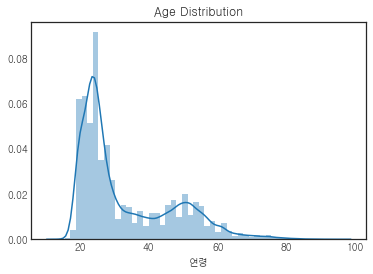

count    217373.000000
mean         33.025100
std          13.639533
min          14.000000
25%          23.000000
50%          27.000000
75%          43.000000
max          95.000000
Name: CLN_AGE, dtype: float64

In [473]:
# 연령별 분포
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(data_clean['CLN_AGE'])
plt.xlabel("연령")
plt.title("Age Distribution") 
plt.show()
data_clean['CLN_AGE'].describe()

#### 이용자의 대부분이 20대에 분포되어 있으며, 평균 연령은 33세이다

### (2) 일자별 분포

In [474]:
data_clean['APV_TS_DATETIME'].dt.day.values

array([10, 11,  2, ..., 31,  7, 24], dtype=int64)

C:\Users\JY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


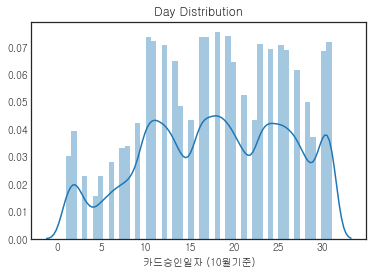

In [475]:
# 일자별 분포를 보기 위해 데이터에 일자 apv_day 추가 
data_clean['APV_DAY'] = data_clean['APV_TS_DATETIME'].dt.day

sns.distplot(data_clean['APV_DAY'])
plt.xlabel("카드승인일자 (10월기준)")
plt.title("Day Distribution") # You can comment this line out if you don't need title
plt.show()

#### 일자별 분포를 봤을 때 월 초에는 거래량이 적은데, 이는 2017년 10월 첫째주가 추석 연휴였기 때문으로 추정됨

### (3) 요일별 분포

In [476]:
data_clean['APV_WEEK'] = data_clean['APV_TS_DATETIME'].dt.day_name()

C:\Users\JY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


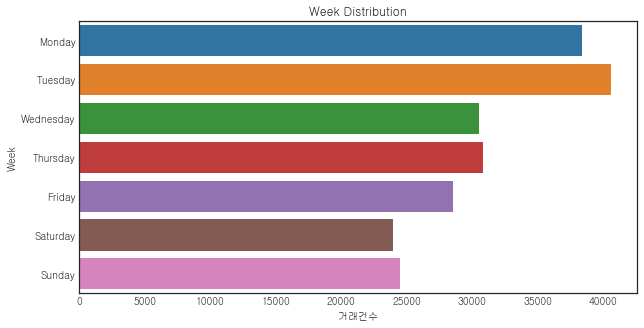

In [477]:
# 요일별 분포

week_count=data_clean['APV_WEEK'].value_counts()
order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(10,5))

sns.barplot(week_count.values, week_count.index, order=order)
plt.ylabel("Week")
plt.xlabel("거래건수")
plt.title("Week Distribution")
plt.show()

#### 요일별 건수를 보면 월,화에 거래가 많은 것처럼 보이는데, 10월에 다른 요일보다 월,화가 더 많기 때문에 왜곡이 발생할 수 있음. <br>하지만 토,일에 평소보다 이용이 줄어드는 것은 (왜곡에도 불구하고) 명확해보인다.

### (4) 시간대별 분포

C:\Users\JY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


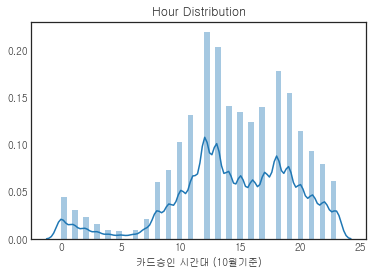

In [478]:
# 시간별 분포

# 시간대별 분포를 보기 위해 데이터에 Hour 정보 추가 
data_clean['APV_TIME'] = data_clean['APV_TS_DATETIME'].dt.hour

sns.distplot(data_clean['APV_TIME'])
plt.xlabel("카드승인 시간대 (10월기준)")
plt.title("Hour Distribution") # You can comment this line out if you don't need title
plt.show()

### (5) 성별 분포

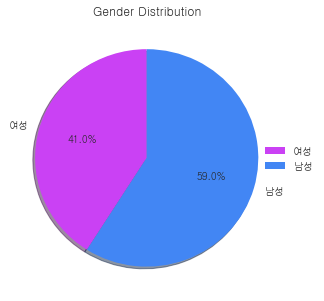

In [479]:
# 성별 분포
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
female = data_clean[data_clean['SEX_CCD']=='F']['CLNN'].count()
male = data_clean[data_clean['SEX_CCD']=='M']['CLNN'].count()
list = [female,male]
label = ['여성','남성']
plt.subplots(figsize=(5,5))
pie=plt.pie(list,labels=label, colors=["#CA41f4", "#4286f4"],autopct='%1.1f%%',shadow=True, startangle=90)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.legend(pie[0],label, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10,bbox_transform=plt.gcf().transFigure)
plt.title("Gender Distribution")
plt.show()

#### 여성이 41%, 남성이 59%로 남성이 조금 더 많다

### (5) 가맹점 업종별 분포

####  (5)-1. 업종별 건수

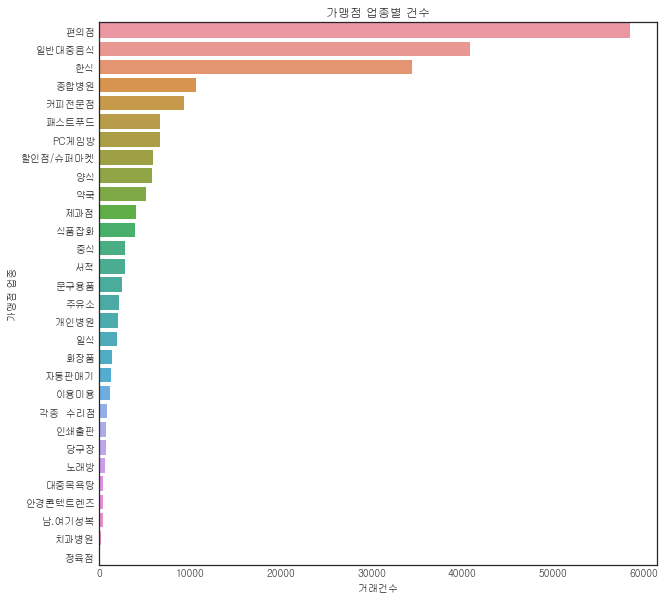

In [480]:
# 가맹점 업종별 단순 건수 그래프

# 가맹점 업종별 건수로 정렬하고 상위 30개 업종만 도출
mct_30 = data_clean['MCT_RY_NM'].value_counts()[:30].to_frame()

plt.figure(figsize=(10,10))
sns.countplot(y='MCT_RY_NM', data=data_clean, order = data_clean['MCT_RY_NM'].value_counts().iloc[:30].index)
plt.xlabel("거래건수")
plt.ylabel("가맹점 업종")
plt.title("가맹점 업종별 건수")
plt.show()

#### (5)-2. 연령별로 많이 이용한 가맹점 업종 TOP 5

In [481]:
dataage20_30 = data_clean.loc[(data_clean['CLN_AGE'] >= 20) & (data_clean['CLN_AGE'] < 30) , :]

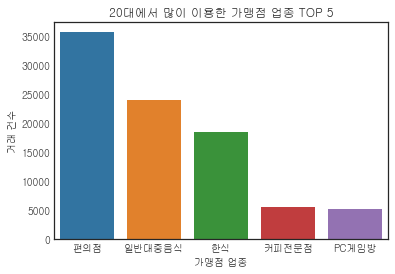

In [482]:
category = data_clean.loc[(data_clean['CLN_AGE'] >= 20) & (data_clean['CLN_AGE'] < 30) , :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("20대에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

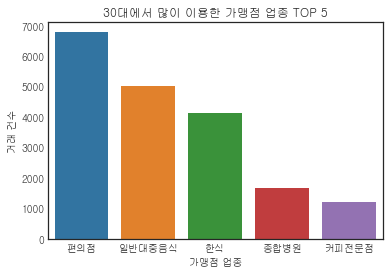

In [483]:
category = data_clean.loc[(data_clean['CLN_AGE'] >= 30) & (data_clean['CLN_AGE'] < 40) , :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("30대에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

#### 30대부터 top 5 업종에 종합병원이 포함되어 있음

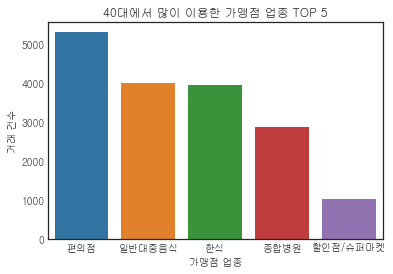

In [484]:
category = data_clean.loc[(data_clean['CLN_AGE'] >= 40) & (data_clean['CLN_AGE'] < 50) , :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("40대에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

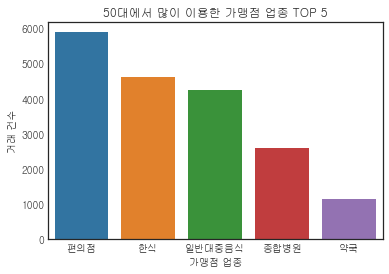

In [485]:
category = data.loc[(data['CLN_AGE'] >= 50) & (data['CLN_AGE'] < 60) , :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("50대에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

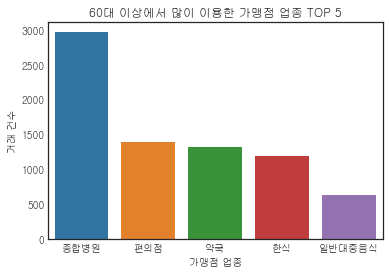

In [486]:
category = data_clean.loc[(data_clean['CLN_AGE'] >= 60), :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("60대 이상에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

#### 60대 이상의 경우, 종합병원 이용 건수가 현저히 높음

#### (5)-3. 특정 업종-예: 종합병원-에 대한 내역만 추출하여 확인

#### 종합병원 이용 고객의 연령별 분포

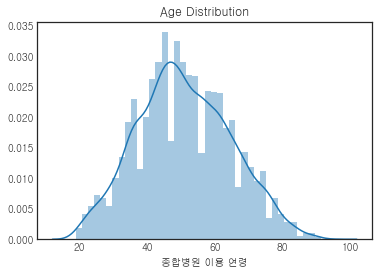

count    10727.000000
mean        50.979211
std         13.742567
min         19.000000
25%         41.000000
50%         50.000000
75%         61.000000
max         95.000000
Name: CLN_AGE, dtype: float64

In [487]:
# 가맹점 업종 - 종합병원에 대해서만
datahospitol = data_clean.loc[data_clean['MCT_RY_NM'] == '종합병원', :]

# 종합병원 이용 연령별 분포
import seaborn as sns
sns.distplot(datahospitol['CLN_AGE'])
plt.xlabel("종합병원 이용 연령")
plt.title("Age Distribution")
plt.show()
datahospitol['CLN_AGE'].describe()

#### 전체 연령별 분포와 다르게, 종합병원 이용 고객의 분포는 50대를 평균으로 좌우 고르게 전 연령에 걸쳐 분포되어 있음을 알 수 있다

### (6) 연령별 이용건수 분포

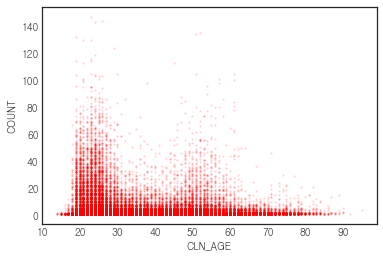

In [488]:
""" 연령별 이용건수 분포 확인 """
temp01=data_clean.groupby(["CLNN","CLN_AGE"]).size().reset_index(name="COUNT")
temp02=data_clean.groupby(["CLNN","SAA"]).size().reset_index(name="SUM")
plt.scatter(temp01["CLN_AGE"], temp01["COUNT"], c = 'red', s = 2, alpha = 0.1)
plt.xlabel("CLN_AGE")
plt.ylabel("COUNT")
plt.show()
del temp01

### (7) 연령별/업종별 취급액/이용건수 pivot

In [489]:
data_clean["AGE_CCD"] = data_clean["CLN_AGE"] // 10 * 10
data_clean["SAA(10K)"] = data_clean["SAA"] / 10000
""" 연령별/업종별 취급액/이용건수 pivot 생성"""
pivot_mct_ry = pd.pivot_table(data=data_clean, index = ['MCT_RY_NM'], values = ['SAA'],
columns = ['AGE_CCD'], aggfunc = [len], fill_value = 0)
pivot_mct_ry.columns = ['10대','20대','30대','40대','50대','60대','70대','80대','90대']
pivot_mct_ry_sort = pivot_mct_ry.sort_values(by = "20대", ascending=False)

C:\Users\JY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\JY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [490]:
pivot_mct_ry_sort

,10대,20대,30대,40대,50대,60대,70대,80대,90대
MCT_RY_NM,,,,,,,,,
편의점,3307,35723,6804,5330,5910,1143,223,34,0
일반대중음식,2753,24095,5029,4021,4264,490,136,15,1
한식,2034,18434,4162,3968,4630,853,307,35,2
커피전문점,404,5645,1236,880,1019,163,23,3,0
PC게임방,608,5164,403,189,295,17,5,1,0
패스트푸드,286,4234,731,678,664,92,18,0,0
양식,336,3522,749,450,623,97,17,2,0
할인점/슈퍼마켓,161,2585,823,1026,914,312,89,15,0
식품잡화,235,2252,481,457,501,69,17,4,0


In [491]:
del data_clean["AGE_CCD"]
del data_clean["SAA(10K)"]

### (8) 가로축을 시간, 세로축을 금액으로 하여 업종별 그래프

#### 편의점 업종

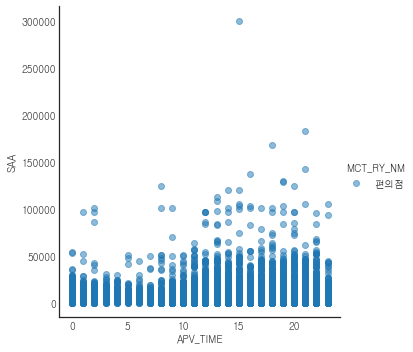

In [492]:
sns.FacetGrid(data_clean.loc[data_clean['MCT_RY_NM']=="편의점",:], hue="MCT_RY_NM",
              size=5).map(plt.scatter,"APV_TIME","SAA", alpha=0.5).add_legend()
plt.show()

#### 커피전문점 업종

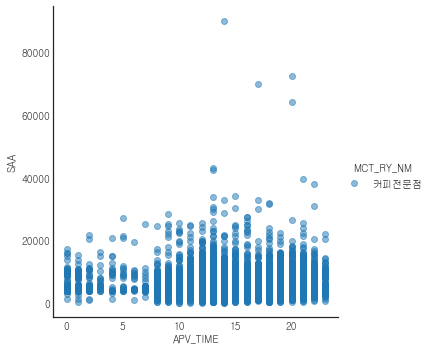

In [493]:
sns.FacetGrid(data_clean.loc[data_clean['MCT_RY_NM']=="커피전문점",:], hue="MCT_RY_NM",
              size=5).map(plt.scatter,"APV_TIME","SAA", alpha=0.5).add_legend()
plt.show()

#### TOP 5 업종

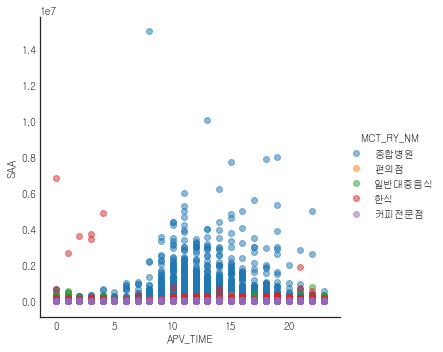

In [494]:
sns.FacetGrid(data_clean.loc[(data_clean['MCT_RY_NM']=="일반대중음식")|
                             (data_clean['MCT_RY_NM']=="한식")|
                             (data_clean['MCT_RY_NM']=="종합병원")|
                             (data_clean['MCT_RY_NM']=="편의점")|
                             (data_clean['MCT_RY_NM']=="커피전문점")
                             ,:], hue="MCT_RY_NM",
              size=5).map(plt.scatter, "APV_TIME", "SAA", alpha=0.5).add_legend()
plt.show()

### (9) 신용/체크카드 구분에 따른 분포

In [495]:
# 신용 정보 (0:체크, 1: 신용카드)
dataage_crd_tcd_0 = data_clean.loc[data_clean['CRD_TCD']== 0 , :]
dataage_crd_tcd_1 = data_clean.loc[data_clean['CRD_TCD']== 1 , :]

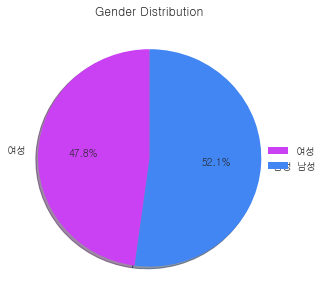

In [496]:
#체크 카드 쓰는 성비
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
female = dataage_crd_tcd_0[dataage_crd_tcd_0['SEX_CCD']=='F']['CLNN'].count()
male = dataage_crd_tcd_0[dataage_crd_tcd_0['SEX_CCD']=='M']['CLNN'].count()
list = [female,male]
label = ['여성','남성']
plt.subplots(figsize=(5,5))
pie=plt.pie(list,labels=label, colors=["#CA41f4", "#4286f4"],autopct='%1.1f%%',shadow=True, startangle=90)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.legend(pie[0],label, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10,bbox_transform=
plt.gcf().transFigure)
plt.title("Gender Distribution")
plt.show()

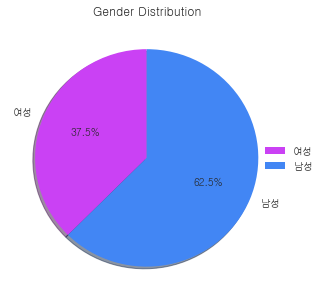

In [497]:
#신용카드 쓰는 성비
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
female = dataage_crd_tcd_1[dataage_crd_tcd_1['SEX_CCD']=='F']['CLNN'].count()
male = dataage_crd_tcd_1[dataage_crd_tcd_1['SEX_CCD']=='M']['CLNN'].count()
list = [female,male]
label = ['여성','남성']
plt.subplots(figsize=(5,5))
pie=plt.pie(list,labels=label, colors=["#CA41f4", "#4286f4"],autopct='%1.1f%%',shadow=True, startangle=90)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.legend(pie[0],label, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10,bbox_transform=
plt.gcf().transFigure)
plt.title("Gender Distribution")
plt.show()

### (9) Heatmap

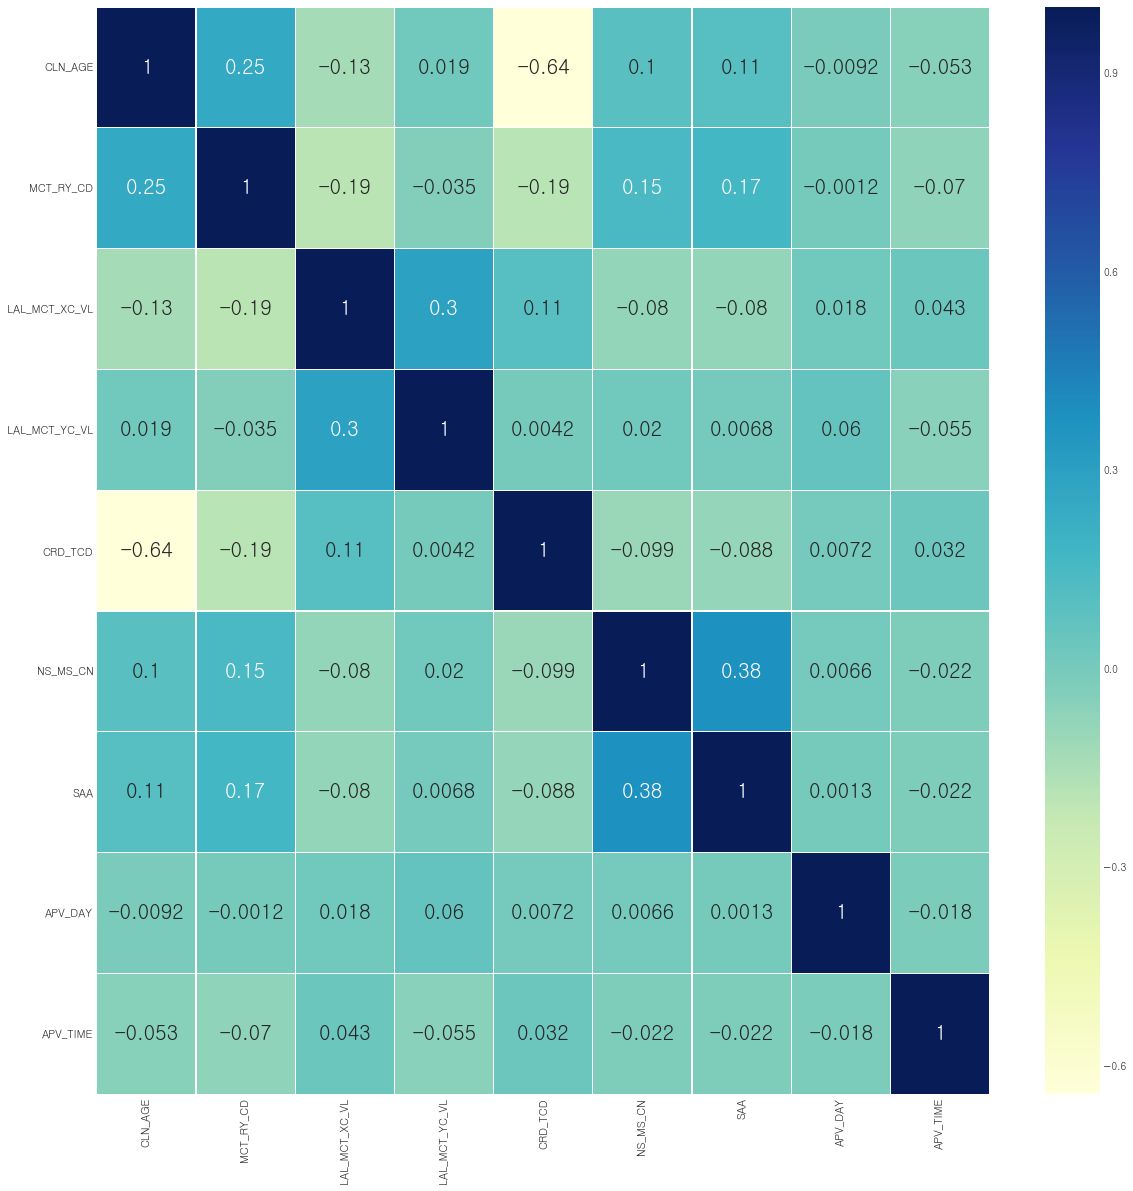

In [498]:
# 전체 변수 correlation 분석
corr = data_clean.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

### (10) 가맹점 좌표 데이터 지도에 찍어보기

In [499]:

import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import folium
import sys



""" 데이터 불러오기 """
# 윈도우 환경에서 파일을 그대로 읽으면 유니코드 에러 발생, encoding을 CP949로 강제 지정해준다
df = pd.read_csv('Input/dfe_mct_data_set.csv',encoding='CP949')
## data = pd.read_csv('../Input/creditcard.csv',header=None)

""" 연령코드 생성 """
df["AGE_CCD"] =  df["CLN_AGE"] // 10 * 10 
df["SAA(10K)"] =  df["SAA"] / 10000 




""" 좌표값 셋팅을 위한 빈리스트 선언 """
lattitude2=[]
longitude2=[]

""" X좌표 Y좌표 값만 셋팅(건수컬럼삭제) """
lattitude1=df.groupby(["LAL_MCT_XC_VL"]).size().reset_index(name="건수")
del lattitude1["건수"]
longitude1=df.groupby(["LAL_MCT_YC_VL"]).size().reset_index(name="건수")
del longitude1["건수"]

lattitude2=lattitude1["LAL_MCT_XC_VL"].values
longitude2=longitude1["LAL_MCT_YC_VL"].values


""" 하나의 데이터프레임으로 X,Y좌표값 합치기 """
lattitude3=df.groupby(["LAL_MCT_XC_VL","LAL_MCT_YC_VL"]).size().reset_index(name="건수")
del lattitude3["건수"]

lattitude3.info()

"""  X,Y좌표값 컬럼값변환 """
lattitude3.columns=["X","Y"]


""" 고대안암병원 좌표 셋팅 """
KU = [37.58721205, 127.0270194]

""" 가맹점 좌표 갯수만큼만  """
MAX_RECORDS = lattitude3["X"].count()
"""print(lattitude3[0:MAX_RECORDS].iterrows())"""
# create empty map zoomed in on San Francisco

map_osm = folium.Map(location=KU, zoom_start=16)

# add a marker for every record in the filtered data, use a clustered view

for each in lattitude3[0:MAX_RECORDS].iterrows():
    folium.Marker(location = [each[1]['Y'],each[1]['X']],popup='address').add_to(map_osm)
  
map_osm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 2 columns):
LAL_MCT_XC_VL    351 non-null float64
LAL_MCT_YC_VL    351 non-null float64
dtypes: float64(2)
memory usage: 5.6 KB
